# Integral de Fourier

Considere la función pulso unitario: f(x)=1 si -1 <= x <= 1, 0 en otro caso. \\
a) Grafique esta función.\
b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.\
c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b).\
Ver páginas 61 y 62 del Kreyszig.


In [2]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos la funcion
def f(x):
  return 1 if -1 <= x <= 1 else 0



a) Grafique esta función

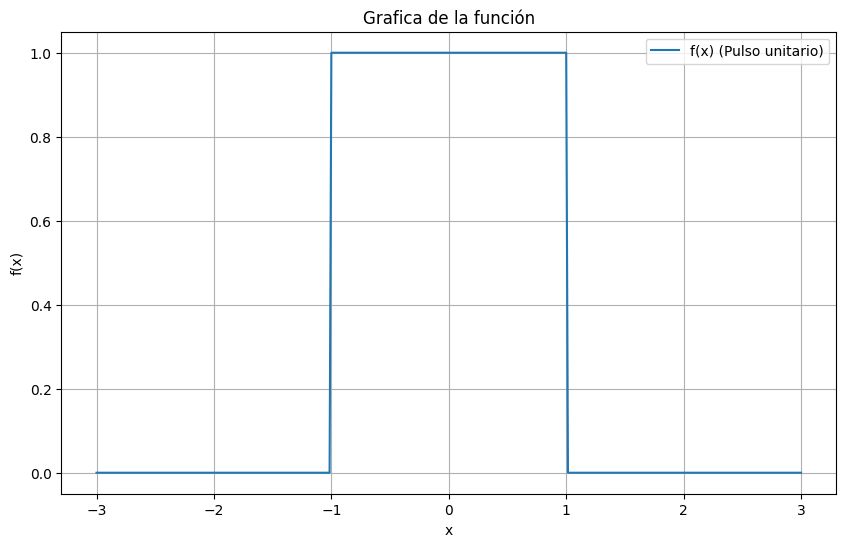

In [3]:

x_vals = np.linspace(-3, 3, 400)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) (Pulso unitario)')
plt.title('Grafica de la función')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy. Grafique el resultado sobre la función original y compare.


In [10]:

import sympy as sp

# Definir símbolos
x, k = sp.symbols('x k', real=True)
f_x = 1  # entre -1 y 1

# Transformada de Fourier (F(k))
F_k = sp.integrate(sp.exp(-sp.I * k * x), (x, -1, 1))
F_k = sp.simplify(F_k)

# Inversa de la transformada (reconstrucción de f(x))
f_x_recon = (1/(2*sp.pi)) * sp.integrate(F_k * sp.exp(sp.I * k * x), (k, -sp.oo, sp.oo))

# Mostrar resultados
print("Transformada de Fourier F(k):")
sp.pprint(F_k)
print("\nReconstrucción simbólica de f(x):")
sp.pprint(f_x_recon)


Transformada de Fourier F(k):
⎧2⋅sin(k)                   
⎪────────  for k > 0 ∨ k < 0
⎨   k                       
⎪                           
⎩   2          otherwise    

Reconstrucción simbólica de f(x):
∞                                        
⌠                                        
⎮  ⎧   ⅈ⋅k⋅x                             
⎮  ⎪2⋅ℯ     ⋅sin(k)                      
⎮  ⎪───────────────  for k > 0 ∨ k < 0   
⎮  ⎨       k                           dk
⎮  ⎪                                     
⎮  ⎪      ⅈ⋅k⋅x                          
⎮  ⎩   2⋅ℯ               otherwise       
⌡                                        
-∞                                       
─────────────────────────────────────────
                   2⋅π                   


a0 = 1.00000000000000
an = Piecewise((2.0*sin(pi*n)/(pi*n), (n > 0) | (n < 0)), (2.0, True))
bn = 0


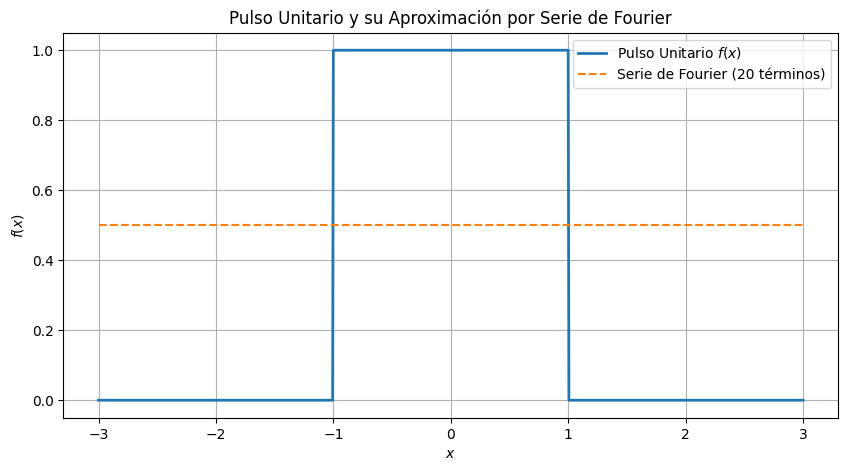

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# a) Definir la función pulso unitario
def pulso_unitario(x):
    return np.where(np.abs(x) <= 1, 1, 0)

# b) Cálculo simbólico de la serie de Fourier

# Declaramos variables simbólicas
x, n, L = sp.symbols('x n L', real=True)
L_val = 1  # Longitud del medio período

# Definimos la función f(x) = 1 en [-1,1], 0 en otro lado
f = sp.Piecewise((1, (x >= -1) & (x <= 1)), (0, True))

# Coeficiente a0 (término constante)
a0 = (1 / (2 * L_val)) * sp.integrate(f.subs(L, L_val), (x, -L_val, L_val))
a0_val = a0.simplify()

# Coeficientes an y bn
an = (1 / L_val) * sp.integrate(f.subs(L, L_val) * sp.cos(n * sp.pi * x / L_val), (x, -L_val, L_val))
bn = (1 / L_val) * sp.integrate(f.subs(L, L_val) * sp.sin(n * sp.pi * x / L_val), (x, -L_val, L_val))

an_simpl = an.simplify()
bn_simpl = bn.simplify()

# Mostrar resultados simbólicos
print("a0 =", a0_val)
print("an =", an_simpl)
print("bn =", bn_simpl)

# Crear función para calcular la serie de Fourier truncada
def fourier_series(x_vals, N_terms):
    result = float(a0_val) / 2
    for n_val in range(1, N_terms + 1):
        an_val = float(an_simpl.subs(n, n_val))
        bn_val = float(bn_simpl.subs(n, n_val))
        result += an_val * np.cos(n_val * np.pi * x_vals) + bn_val * np.sin(n_val * np.pi * x_vals)
    return result

# Crear puntos de evaluación
x_vals = np.linspace(-3, 3, 1000)
f_vals = pulso_unitario(x_vals)
fs_vals = [fourier_series(xi, 20) for xi in x_vals]  # 20 términos

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals, label='Pulso Unitario $f(x)$', linewidth=2)
plt.plot(x_vals, fs_vals, label='Serie de Fourier (20 términos)', linestyle='--')
plt.title('Pulso Unitario y su Aproximación por Serie de Fourier')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


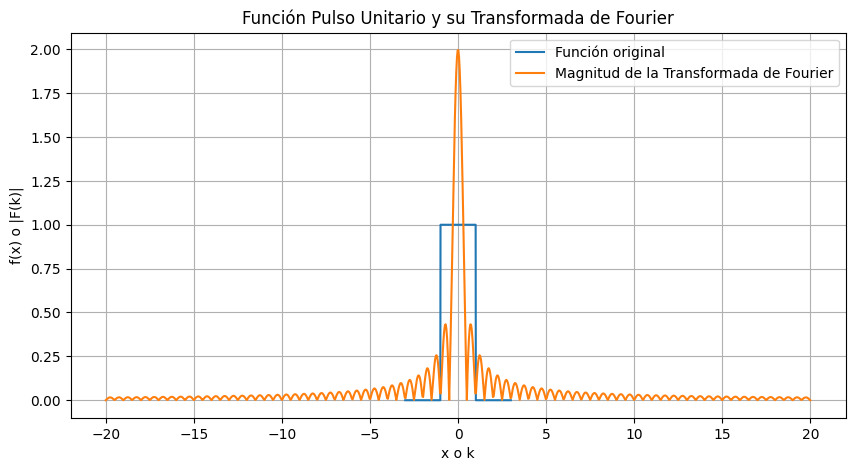

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir variables
x, k = sp.symbols('x k', real=True)

# Definir la función pulso unitario
def f(x):
    return sp.Piecewise((1, (x >= -1) & (x <= 1)), (0, True))

# Calcular la transformada de Fourier
F_k = sp.fourier_transform(f(x), x, k)

# La representación como integral de Fourier sería:
f_reconstruida = 1/(2*sp.pi) * sp.integrate(F_k * sp.exp(sp.I*k*x), (k, -sp.oo, sp.oo))

# Simplificar la expresión
F_k_simplificado = sp.simplify(F_k)# Convertir a funciones numéricas
f_numeric = sp.lambdify(x, f(x), 'numpy')
F_k_numeric = sp.lambdify(k, F_k_simplificado, 'numpy')

# Rango para graficar
x_vals = np.linspace(-3, 3, 1000)

# Gráfico de la función original
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_numeric(x_vals), label='Función original')

# Gráfico de la reconstrucción usando la integral de Fourier
# (Esto requeriría una integración numérica más compleja)
# Para simplificar, mostramos solo la transformada
k_vals = np.linspace(-20, 20, 1000)
plt.plot(k_vals, np.abs(F_k_numeric(k_vals)), label='Magnitud de la Transformada de Fourier')

plt.title('Función Pulso Unitario y su Transformada de Fourier')
plt.xlabel('x o k')
plt.ylabel('f(x) o |F(k)|')
plt.legend()
plt.grid(True)
plt.show()


c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy. Grafique sobre la función original en un panel distinto al del inciso b).

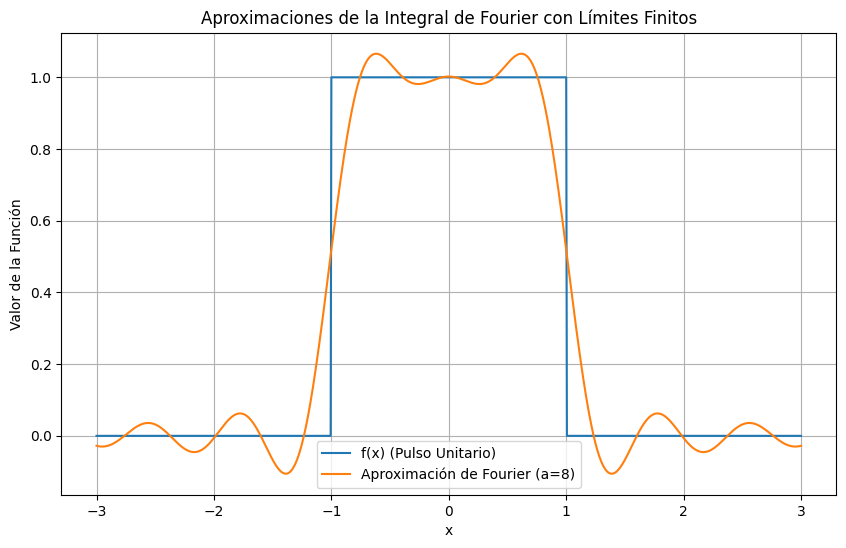

In [23]:
def aproximacion_fourier_limite_finito(valor_x, a):

    integrando = lambda w: (2/np.pi) * (np.sin(w) / w) * np.cos(w * valor_x) if w != 0 else (2/np.pi) * 1.0 * np.cos(0)
    # Integra numéricamente el integrando desde un épsilon pequeño (1e-6) hasta 'a'
    resultado, error = quad(integrando, 1e-6, a)
    return resultado

# Define los valores finitos para el límite superior de la integral
valores_a = [8]

# Crea una nueva figura para el gráfico
plt.figure(figsize=(10, 6))

# Grafica la función original (Pulso unitario)
# Se usa la función f previamente definida para calcular los valores y en base a x_vals
plt.plot(x_vals, [f(x) for x in x_vals], label='f(x) (Pulso Unitario)')

# Itera sobre los diferentes valores de 'a' para graficar las aproximaciones
for a in valores_a:
    # Calcula los valores de la aproximación de Fourier para cada x en x_vals y el 'a' actual
    aproximacion_fourier_a = [aproximacion_fourier_limite_finito(valor, a) for valor in x_vals]
    # Grafica la aproximación de Fourier para el 'a' actual
    plt.plot(x_vals, aproximacion_fourier_a, label=f'Aproximación de Fourier (a={a})')

# Establece el título del gráfico
plt.title('Aproximaciones de la Integral de Fourier con Límites Finitos')
# Establece la etiqueta del eje x
plt.xlabel('x')
# Establece la etiqueta del eje y
plt.ylabel('Valor de la Función')
# Activa la cuadrícula en el gráfico
plt.grid(True)
# Muestra la leyenda para identificar las diferentes líneas
plt.legend()
# Muestra el gráfico
plt.show()

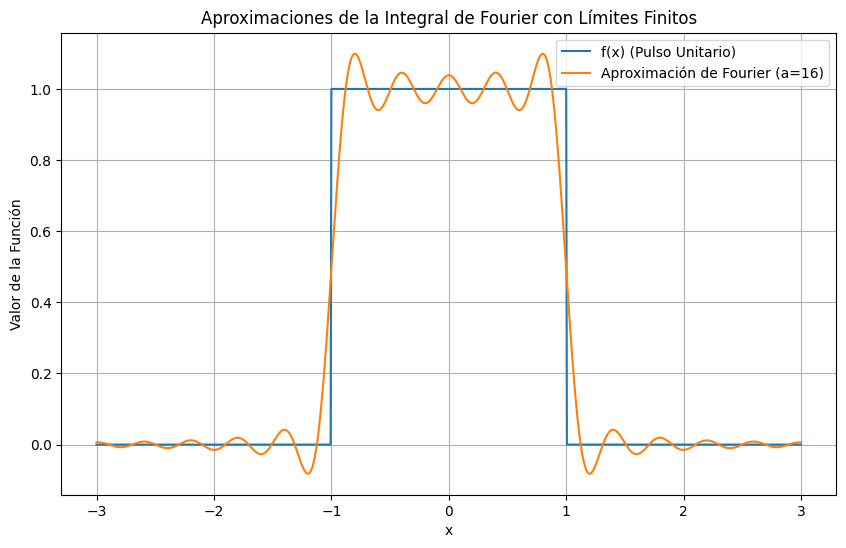

In [24]:
def aproximacion_fourier_limite_finito(valor_x, a):

    integrando = lambda w: (2/np.pi) * (np.sin(w) / w) * np.cos(w * valor_x) if w != 0 else (2/np.pi) * 1.0 * np.cos(0)
    # Integra numéricamente el integrando desde un épsilon pequeño (1e-6) hasta 'a'
    resultado, error = quad(integrando, 1e-6, a)
    return resultado

# Define los valores finitos para el límite superior de la integral
valores_a = [ 16]

# Crea una nueva figura para el gráfico
plt.figure(figsize=(10, 6))

# Grafica la función original (Pulso unitario)
# Se usa la función f previamente definida para calcular los valores y en base a x_vals
plt.plot(x_vals, [f(x) for x in x_vals], label='f(x) (Pulso Unitario)')

# Itera sobre los diferentes valores de 'a' para graficar las aproximaciones
for a in valores_a:
    # Calcula los valores de la aproximación de Fourier para cada x en x_vals y el 'a' actual
    aproximacion_fourier_a = [aproximacion_fourier_limite_finito(valor, a) for valor in x_vals]
    # Grafica la aproximación de Fourier para el 'a' actual
    plt.plot(x_vals, aproximacion_fourier_a, label=f'Aproximación de Fourier (a={a})')

# Establece el título del gráfico
plt.title('Aproximaciones de la Integral de Fourier con Límites Finitos')
# Establece la etiqueta del eje x
plt.xlabel('x')
# Establece la etiqueta del eje y
plt.ylabel('Valor de la Función')
# Activa la cuadrícula en el gráfico
plt.grid(True)
# Muestra la leyenda para identificar las diferentes líneas
plt.legend()
# Muestra el gráfico
plt.show()

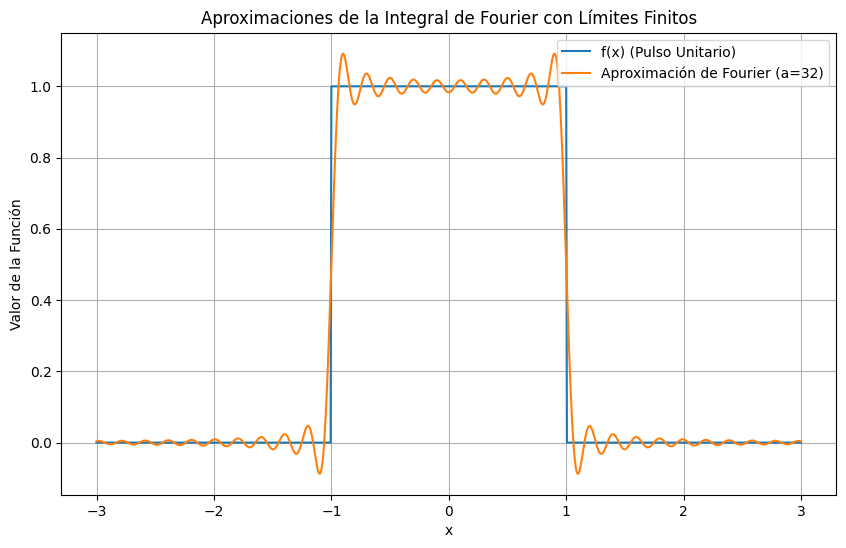

In [25]:
def aproximacion_fourier_limite_finito(valor_x, a):

    integrando = lambda w: (2/np.pi) * (np.sin(w) / w) * np.cos(w * valor_x) if w != 0 else (2/np.pi) * 1.0 * np.cos(0)
    # Integra numéricamente el integrando desde un épsilon pequeño (1e-6) hasta 'a'
    resultado, error = quad(integrando, 1e-6, a)
    return resultado

# Define los valores finitos para el límite superior de la integral
valores_a = [32]

# Crea una nueva figura para el gráfico
plt.figure(figsize=(10, 6))

# Grafica la función original (Pulso unitario)
# Se usa la función f previamente definida para calcular los valores y en base a x_vals
plt.plot(x_vals, [f(x) for x in x_vals], label='f(x) (Pulso Unitario)')

# Itera sobre los diferentes valores de 'a' para graficar las aproximaciones
for a in valores_a:
    # Calcula los valores de la aproximación de Fourier para cada x en x_vals y el 'a' actual
    aproximacion_fourier_a = [aproximacion_fourier_limite_finito(valor, a) for valor in x_vals]
    # Grafica la aproximación de Fourier para el 'a' actual
    plt.plot(x_vals, aproximacion_fourier_a, label=f'Aproximación de Fourier (a={a})')

# Establece el título del gráfico
plt.title('Aproximaciones de la Integral de Fourier con Límites Finitos')
# Establece la etiqueta del eje x
plt.xlabel('x')
# Establece la etiqueta del eje y
plt.ylabel('Valor de la Función')
# Activa la cuadrícula en el gráfico
plt.grid(True)
# Muestra la leyenda para identificar las diferentes líneas
plt.legend()
# Muestra el gráfico
plt.show()

Y si lo visualizamos los tres graficos en uno se ve de la siguiente manera

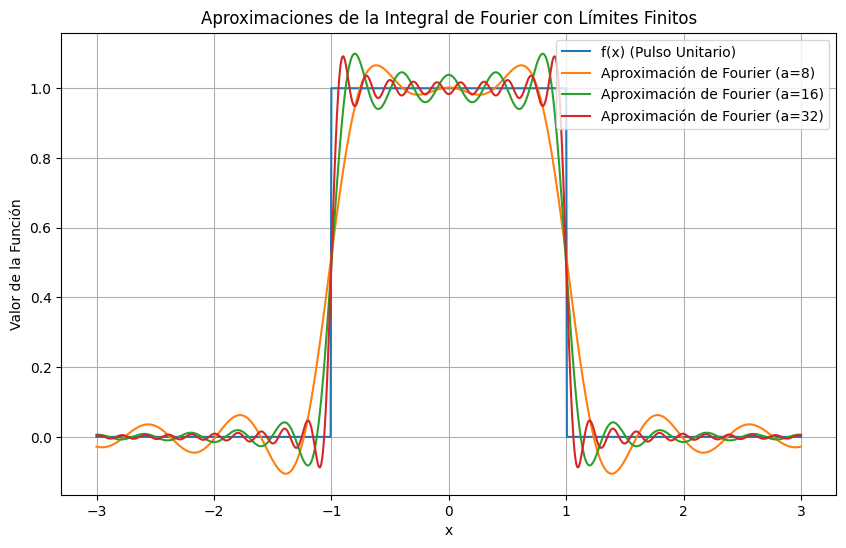

In [17]:
def aproximacion_fourier_limite_finito(valor_x, a):

    integrando = lambda w: (2/np.pi) * (np.sin(w) / w) * np.cos(w * valor_x) if w != 0 else (2/np.pi) * 1.0 * np.cos(0)
    # Integra numéricamente el integrando desde un épsilon pequeño (1e-6) hasta 'a'
    resultado, error = quad(integrando, 1e-6, a)
    return resultado

# Define los valores finitos para el límite superior de la integral
valores_a = [8, 16, 32]

# Crea una nueva figura para el gráfico
plt.figure(figsize=(10, 6))

# Grafica la función original (Pulso unitario)
# Se usa la función f previamente definida para calcular los valores y en base a x_vals
plt.plot(x_vals, [f(x) for x in x_vals], label='f(x) (Pulso Unitario)')

# Itera sobre los diferentes valores de 'a' para graficar las aproximaciones
for a in valores_a:
    # Calcula los valores de la aproximación de Fourier para cada x en x_vals y el 'a' actual
    aproximacion_fourier_a = [aproximacion_fourier_limite_finito(valor, a) for valor in x_vals]
    # Grafica la aproximación de Fourier para el 'a' actual
    plt.plot(x_vals, aproximacion_fourier_a, label=f'Aproximación de Fourier (a={a})')

# Establece el título del gráfico
plt.title('Aproximaciones de la Integral de Fourier con Límites Finitos')
# Establece la etiqueta del eje x
plt.xlabel('x')
# Establece la etiqueta del eje y
plt.ylabel('Valor de la Función')
# Activa la cuadrícula en el gráfico
plt.grid(True)
# Muestra la leyenda para identificar las diferentes líneas
plt.legend()
# Muestra el gráfico
plt.show()


F(w) =  sqrt(2)*Piecewise((-I*exp(I*w)/w + I*exp(-I*w)/w, (w > -oo) & (w < oo) & Ne(w, 0)), (2, True))/(2*sqrt(pi))
Integral expression to evaluate for f(x):  Piecewise((-I*exp(I*w)/w + I*exp(-I*w)/w, (w > -oo) & (w < oo) & Ne(w, 0)), (2, True))*exp(I*w*x)/(2*pi)
Fourier integral representation of f(x) =  Integral(Piecewise(((-I*exp(I*w)/w + I*exp(-I*w)/w)*exp(I*w*x)/(2*pi), (w > -oo) & (w < oo) & Ne(w, 0)), (exp(I*w*x)/pi, True)), (w, -oo, oo))


<ipython-input-27-1207969086>:45: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = quad(integrand, 1e-6, 1000) # Use a sufficiently large upper limit
<ipython-input-27-1207969086>:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(integrand, 1e-6, 1000) # Use a sufficiently large upper limit
<ipython-input-27-1207969086>:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine th

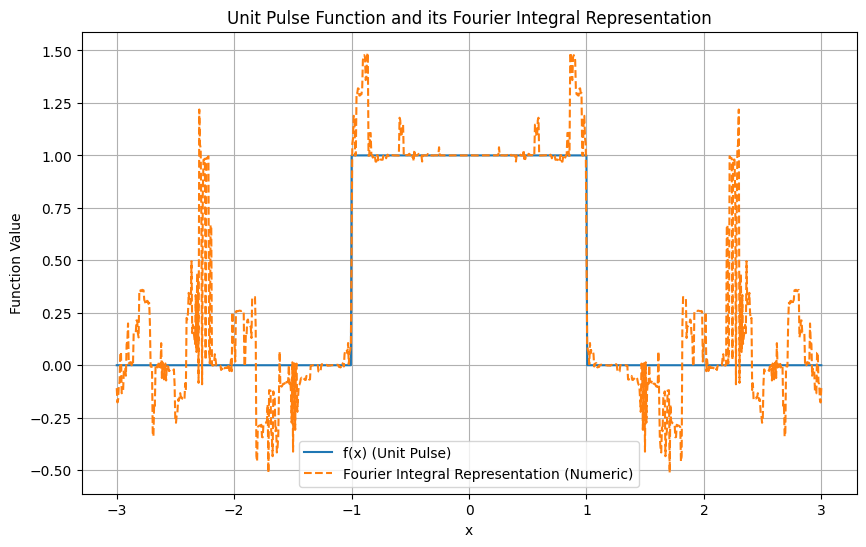

In [27]:
# b) Calculate Fourier integral representation symbolically using sympy
w, x = sp.symbols('w x')

# Fourier integral formula: F(w) = 1/sqrt(2*pi) * integral(f(x)*exp(-i*w*x), from -inf to inf)
# Since f(x) is non-zero only from -1 to 1:
F_w = sp.integrate(1 * sp.exp(-sp.I * w * x), (x, -1, 1))
F_w = F_w / sp.sqrt(2 * sp.pi)

print("F(w) = ", F_w)

# Inverse Fourier Transform: f(x) = 1/sqrt(2*pi) * integral(F(w)*exp(i*w*x), from -inf to inf)
# Substitute F(w)
fourier_integral_expr = (1 / sp.sqrt(2 * sp.pi)) * F_w * sp.exp(sp.I * w * x)
print("Integral expression to evaluate for f(x): ", fourier_integral_expr)

# Calculate the integral symbolically. SymPy can handle this.
# Note: SymPy might not always return a simple closed form for complex integrals.
# The result below shows the integral form, which is expected for this function.
fourier_representation = sp.integrate(fourier_integral_expr, (w, -sp.oo, sp.oo))

print("Fourier integral representation of f(x) = ", fourier_representation)

# The symbolic result should simplify to something related to the sinc function.
# Let's define the sinc function and evaluate it for comparison.
# sinc(x) = sin(pi*x)/(pi*x) in engineering definition, sin(x)/x in mathematical definition
# Based on the Fourier transform of the rectangle function, the result is usually related to sinc(w).
# Let's evaluate the symbolic result at some x values to see if it matches.
# The integral result from sympy is usually in terms of the principal value or special functions.
# A simpler way to express the Fourier integral result for this function is:
# f(x) = 1/pi * integral(sin(w)/w * cos(wx), from 0 to inf) dw (since the function is even)

# Let's plot the numerical evaluation of the Fourier integral.
# We need to evaluate the integral numerically for plotting.
# The integral is: (1/sqrt(2*pi)) * integral((sqrt(2/pi) * sin(w)/w) * exp(i*w*x), from -inf to inf) dw
# This simplifies to: (1/pi) * integral(sin(w)/w * (cos(wx) + i*sin(wx)), from -inf to inf) dw
# Since sin(w)/w is even and sin(wx) is odd, the imaginary part integrates to 0.
# We are left with: (2/pi) * integral(sin(w)/w * cos(wx), from 0 to inf) dw

# Numerical evaluation of the Fourier Integral for plotting
from scipy.integrate import quad

def fourier_integral_numeric(x_val):
    integrand = lambda w: (2/np.pi) * (np.sin(w) / w) * np.cos(w * x_val) if w != 0 else (2/np.pi) * 1.0 * np.cos(0) # Handle w=0
    # Integrate from a small epsilon to a large number to approximate infinity
    result, error = quad(integrand, 1e-6, 1000) # Use a sufficiently large upper limit
    return result

# Use x_vals for calculating the numerical approximation
fourier_approx_vals = [fourier_integral_numeric(val) for val in x_vals]

plt.figure(figsize=(10, 6))
# Plot the original function f(x) using x_vals
plt.plot(x_vals, [f(x) for x in x_vals], label='f(x) (Unit Pulse)')
plt.plot(x_vals, fourier_approx_vals, '--', label='Fourier Integral Representation (Numeric)')
plt.title('Unit Pulse Function and its Fourier Integral Representation')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.grid(True)
plt.legend()
plt.show()